In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
import sklearn
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

### Data Pre-processing

In [4]:
# Reading the Training Data
df = pd.read_csv("test_set_nogt.csv") #, keep_default_na=False) 

In [5]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
1,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
2,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
3,NaN,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00
4,NaN,281.18,0.0,0.0,1,Clear,sky is clear,03-10-2012 02:00


In [6]:
df.replace('','NaN',regex=True,inplace=True)

In [7]:
df.isna().sum()

holiday                9625
temp                      0
rain_1h                   0
snow_1h                   0
clouds_all                0
weather_main              0
weather_description       0
date_time                 0
dtype: int64

#### Holiday

In [8]:
# Change holiday column to be a boolean: 1 if holiday else 0
df["holiday_bool"] = np.where(df.holiday=="NaN", 0, 1)

#### Temperature and Rain


In [9]:
df['temp'].head()

0    289.58
1    290.13
2    291.14
3    291.72
4    281.18
Name: temp, dtype: float64

In [10]:
df['temp'] = df['temp'] - 273.15

In [11]:
# drop outliers from temp and rain
df.drop(df[df.temp < -50].index, inplace=True)
df.drop(df[df.rain_1h > 9000].index, inplace=True)


In [12]:
df['temp'].isna().sum()

0

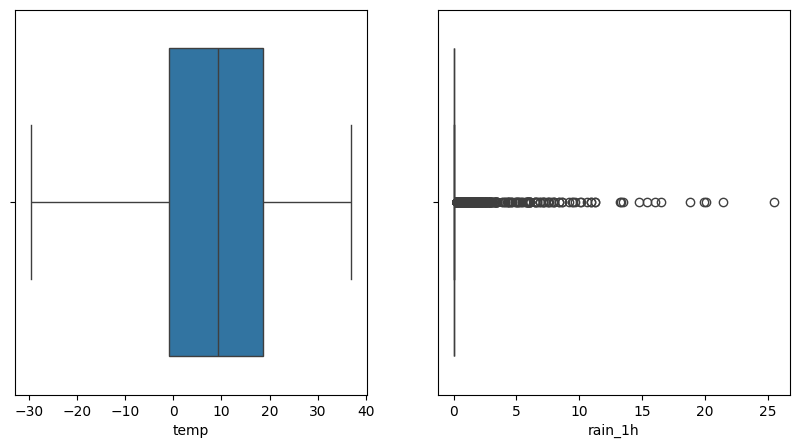

In [10]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
sns.boxplot(x='temp', data = df)
plt.subplot(1,2,2)
sns.boxplot(x='rain_1h', data = df)
plt.show()


#### Date_time

In [13]:
df['date_time'].isna().sum()

0

In [14]:
# convert date_time column to datetime type
#from irdatacleaning import StringToDateTime
df.date_time = pd.to_datetime(df.date_time, dayfirst=True)
#df.date_time = datetime.strptime(df['date_time'],'%d-%m-%Y %H:%M')
#df.date_time = StringToDateTime(df['date_time'])
#df.date_time = df['date_time'].astype('datetime64[ns]')
df['date_time'].isna().sum()

0

In [15]:
# drop datetime if NaN
df.dropna(subset=['date_time'], inplace=True, axis=0)

In [16]:
df.date_time.dtype

dtype('<M8[ns]')

In [17]:
df['date_time'].head()

0   2012-10-02 11:00:00
1   2012-10-02 12:00:00
2   2012-10-02 13:00:00
3   2012-10-02 14:00:00
4   2012-10-03 02:00:00
Name: date_time, dtype: datetime64[ns]

After transforming the variable into date_time format, we can obtain the years, months, days and
hours from it.


##### Year

In [18]:
# extract year feature
years = df.date_time.dt.year
years.value_counts()

date_time
2017    2083
2016    1903
2013    1710
2018    1581
2014     973
2015     894
2012     497
Name: count, dtype: int64

In [165]:
time = pd.DataFrame({
'years' : years,
'traffic_volume' : df.traffic_volume
})

AttributeError: 'DataFrame' object has no attribute 'traffic_volume'

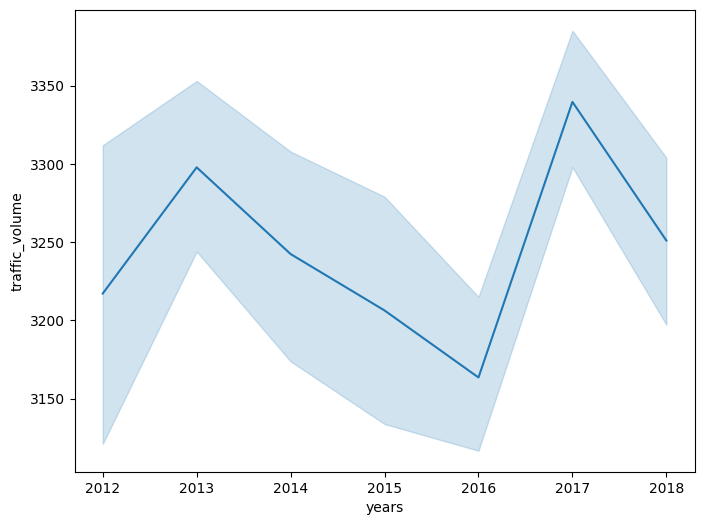

In [167]:
plt.figure(figsize=(8,6))
sns.lineplot(x='years', y='traffic_volume', data= time)
plt.show()

After examining the traffic volume for each year, we can see a decrease in traffic_volume which
occurs around the end of 2015 - beginning of 2016. This could also be due to a lack of data collection
in that period since during the other years the traffic volume remains rather stable.

##### Month

In [19]:
# extract month feature
months = df.date_time.dt.month
months.value_counts()

date_time
7     949
8     878
5     866
4     855
9     839
12    811
1     790
11    778
6     753
3     728
10    711
2     683
Name: count, dtype: int64

In [169]:
time = pd.DataFrame({
'years' : years,
'months': months,
'traffic_volume' : df.traffic_volume
})

AttributeError: 'DataFrame' object has no attribute 'traffic_volume'

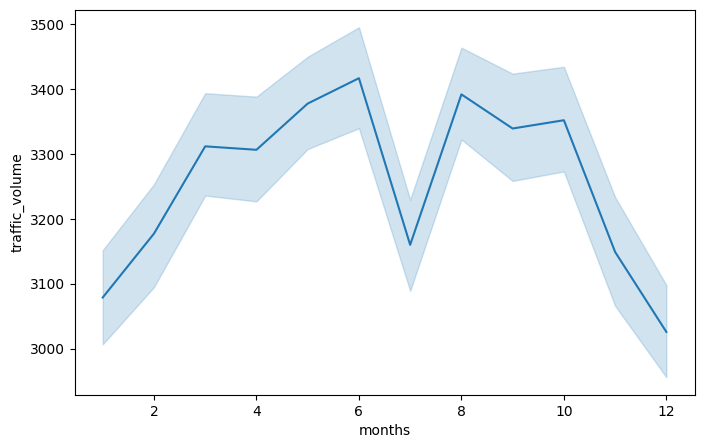

In [170]:
plt.figure(figsize=(8,5))
sns.lineplot(x='months', y='traffic_volume', data= time)
plt.show()

The traffic volume begins to grow from January until a positive peak in June. A sharp decrease
follows in July. Then there is a new increase during the end of the summer period and it starts to
decrease again during the beginning of the winter months.

##### Day of Month


In [20]:
# extract day of month feature
day_of_months = df.date_time.dt.day
day_of_months.value_counts()

date_time
6     361
16    357
25    348
4     345
24    341
18    338
14    335
19    332
15    330
30    325
10    322
9     320
17    319
12    316
20    315
21    315
23    314
5     309
13    308
28    306
11    306
22    305
8     301
3     295
26    295
2     294
1     291
7     291
27    289
29    267
31    151
Name: count, dtype: int64

In [172]:
time = pd.DataFrame({
'years' : years,
'months': months,
'day_of_month':day_of_months,
'traffic_volume' : df.traffic_volume
})

AttributeError: 'DataFrame' object has no attribute 'traffic_volume'

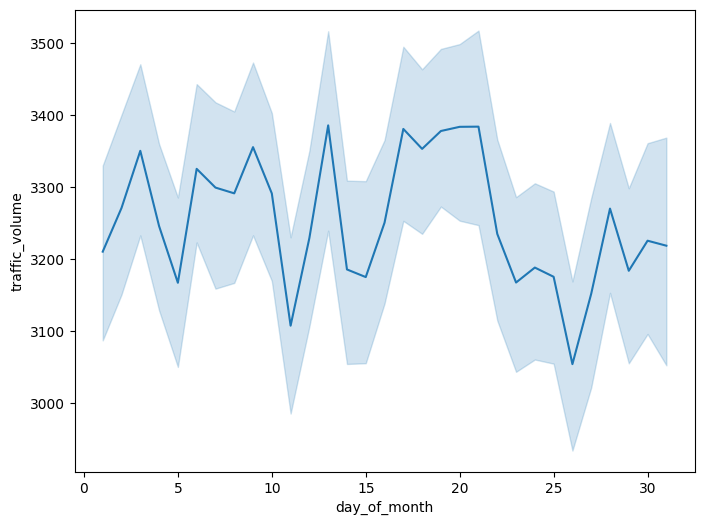

In [173]:
plt.figure(figsize=(8,6))
sns.lineplot(x='day_of_month', y='traffic_volume', data= time)
plt.show()

In this case we notice a rather stable trend in traffic, which remains between the values of 3100
and 3300, with a brief peak towards the end of the month.

##### Day of Week


This time I process the data differently because the goal is to extract the day name.
The process consists of two steps:
- First is to extract the day name literal using pd.Series.dt.day_name() method.
- Afterwards, we need to one-hot encode the results from the first step using pd.get_dummies()
method.

In [21]:
# first: extract the day name literal
days_name = df.date_time.dt.day_name()
# second: one hot encode to 7 columns
days = pd.get_dummies(days_name, dtype=int)
days = days[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
days


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
9636,0,0,0,0,0,0,1
9637,0,0,0,0,0,0,1
9638,0,0,0,0,0,0,1
9639,0,0,0,0,0,0,1


In [175]:
time = pd.DataFrame({
'years' : years,
'months': months,
'day_of_month':day_of_months,
'days_name' : days_name,
'traffic_volume' : df.traffic_volume
})


AttributeError: 'DataFrame' object has no attribute 'traffic_volume'

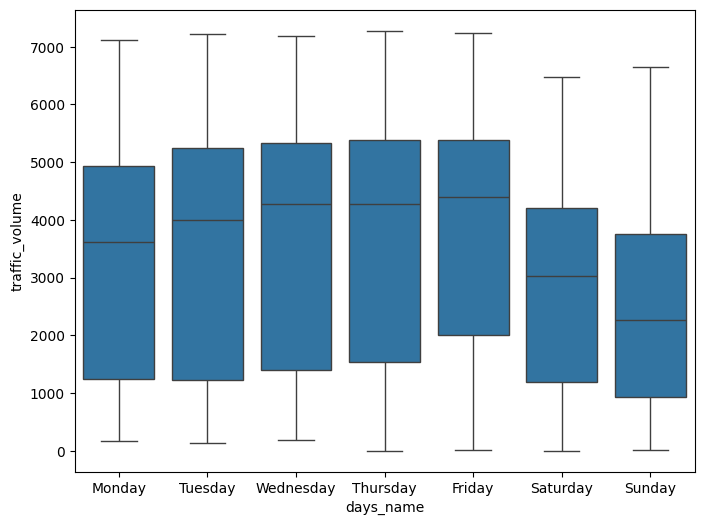

In [176]:
plt.figure(figsize=(8,6))
sns.boxplot(x='days_name',y='traffic_volume', data = time,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()


The traffic volume begins to grow from the first day of the week, Monday, until Friday. During the
weekend the volume lowers a lot, especially on Sundays.

##### Hour

In [22]:
# extract hour feature
hours = df.date_time.dt.hour
hours.value_counts()

date_time
8     436
7     428
9     426
23    423
10    420
0     419
21    418
2     414
12    411
11    410
4     404
16    400
1     398
14    395
17    394
6     394
22    392
3     391
18    391
13    389
5     386
19    385
20    381
15    336
Name: count, dtype: int64

This time I will create a grouping based on the hour digits. Six groups representing each daypart:
- Dawn (02.00 — 05.59), 
- Morning (06.00 —09.59), 
- Noon (10.00–13.59), 
- Afternoon (14.00–17.59),
- Evening (18.00–21.59), and 
- Midnight (22.00–01.59 on Day+1). 

To this end, we create an identifying
function that we later use to feed an apply method of a Series. Afterwards, we perform one-hot
encoding on the resulted dayparts.

In [23]:
# daypart function
def day_part(hours):
    if hours in [2,3,4,5]:
        return "dawn"
    elif hours in [6,7,8,9]:
        return "morning"
    elif hours in [10,11,12,13]:
        return "noon"
    elif hours in [14,15,16,17]:
        return "afternoon"
    elif hours in [18,19,20,21]:
        return "evening"
    else: return "midnight"

In [24]:
# utilize it along with apply method
day_part = hours.apply(day_part)

In [25]:
time = pd.DataFrame({
'years' : years,
'months': months,
'day_of_month':day_of_months,
'days_name' : days_name,
'day_part' :day_part,
'traffic_volume' : df.traffic_volume
})

AttributeError: 'DataFrame' object has no attribute 'traffic_volume'

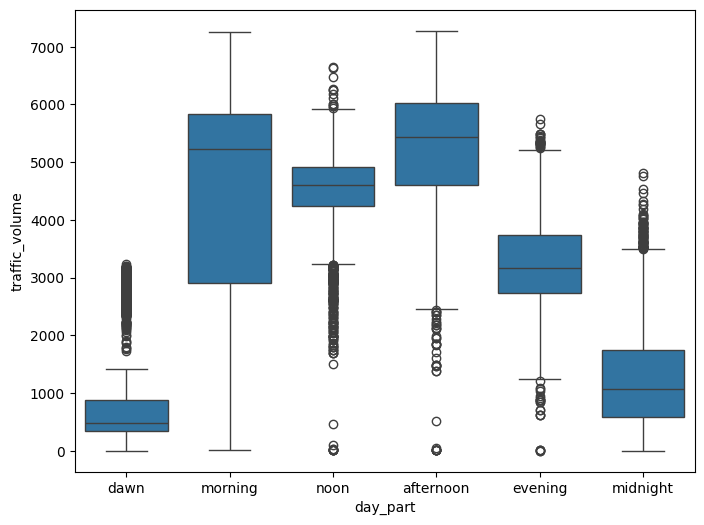

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day_part', y='traffic_volume', data= time, order=['dawn','morning','noon','afternoon','evening','midnight'])
plt.show()

The major traffic volume are registerd during morning and afternoon, while very small values are
registered during midnight and dawn.

In [26]:
# one hot encoding
day_part = pd.get_dummies(day_part, dtype=int)
# re-arrange columns for convenience
day_part = day_part[['dawn','morning','noon','afternoon','evening','midnight']]
#display data
day_part

,dawn,morning,noon,afternoon,evening,midnight
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9636,0,1,0,0,0,0
9637,0,0,1,0,0,0
9638,0,0,0,1,0,0
9639,0,0,0,1,0,0


#### Weather

In [27]:
# dropping weather where holiday is NaN
#df.dropna(subset=['weather_main','holiday'])
# droping thr traffic_volume, holiday and weather main which are having NaN 
#df.dropna(subset=['traffic_volume','holiday','weather_main'],inplace=True,axis=0)
# one-hot encode weather
weathers = pd.get_dummies(df.weather_main, dtype=int)#,dummy_na=True)
#display data
weathers

,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9636,0,1,0,0,0,0,0,0,0,0,0
9637,0,1,0,0,0,0,0,0,0,0,0
9638,0,0,0,0,0,0,1,0,0,0,0
9639,0,0,1,0,0,0,0,0,0,0,0


In [26]:
df['temp'].isna().sum()

0

In [27]:
df['rain_1h'].isna().sum()

0

In [28]:
df['snow_1h'].isna().sum()

0

In [29]:
df['clouds_all'].isna().sum() 

0

In [30]:
years.isna().sum()

0

In [31]:
months.isna().sum()

0

In [32]:
day_of_months.isna().sum()

0

In [33]:
days.isna().sum()

Monday       0
Tuesday      0
Wednesday    0
Thursday     0
Friday       0
Saturday     0
Sunday       0
dtype: int64

In [34]:
day_part.isna().sum()

dawn         0
morning      0
noon         0
afternoon    0
evening      0
midnight     0
dtype: int64

In [35]:
weathers.isna().sum()

Clear           0
Clouds          0
Drizzle         0
Fog             0
Haze            0
Mist            0
Rain            0
Smoke           0
Snow            0
Squall          0
Thunderstorm    0
dtype: int64

In [232]:
df.traffic_volume.isna().sum()

AttributeError: 'DataFrame' object has no attribute 'traffic_volume'

# Final Dataset

Finally, I created a new dataset which include all the transformed variables. It will be composed
by 48193 rows and 33 columns.

In [28]:
 #features to keep with just one column of values
features = pd.DataFrame({
'holiday' :df.holiday_bool,
'temp' : df.temp,
'rain_1h' : df.rain_1h,
'snow_1h' :df.snow_1h,
'clouds_all' : df.clouds_all,
'years' : years,
'months':months,
'day_of_month' : day_of_months
})

In [29]:
#concat with one-hot encode typed features
features = pd.concat([features, days,day_part, weathers], axis = 1)

In [30]:
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       9641 non-null   int32  
 1   temp          9641 non-null   float64
 2   rain_1h       9641 non-null   float64
 3   snow_1h       9641 non-null   float64
 4   clouds_all    9641 non-null   int64  
 5   years         9641 non-null   int32  
 6   months        9641 non-null   int32  
 7   day_of_month  9641 non-null   int32  
 8   Monday        9641 non-null   int32  
 9   Tuesday       9641 non-null   int32  
 10  Wednesday     9641 non-null   int32  
 11  Thursday      9641 non-null   int32  
 12  Friday        9641 non-null   int32  
 13  Saturday      9641 non-null   int32  
 14  Sunday        9641 non-null   int32  
 15  dawn          9641 non-null   int32  
 16  morning       9641 non-null   int32  
 17  noon          9641 non-null   int32  
 18  afternoon     9641 non-null 

In [31]:
features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,years,months,day_of_month,Monday,Tuesday,...,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,1,16.43,0.0,0.0,90,2012,10,2,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1,16.98,0.0,0.0,90,2012,10,2,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,17.99,0.0,0.0,75,2012,10,2,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,18.57,0.0,0.0,1,2012,10,2,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,8.03,0.0,0.0,1,2012,10,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'years',
       'months', 'day_of_month', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'dawn', 'morning', 'noon', 'afternoon',
       'evening', 'midnight', 'Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze',
       'Mist', 'Rain', 'Smoke', 'Snow', 'Squall', 'Thunderstorm'],
      dtype='object')

In [33]:
features['temp'].isna().sum()

0

#### temp_c

In [33]:
# Handling missing values in temp_c with the temperature of that month and that year average
def avg():
    dic = {}
    for k in features['years'].unique():
        features3 = features[features['years']==k][['months','temp']]
        dic[k] = {}
        for i in features3['months']:
            sum = 0
            features2 = features3[features3['months'] == i].dropna()['temp']
            if(len(list(features2)) <=0):
                continue
            else:
                for j in features2:
                    sum += j
                dic[k][i] = sum/len(list(features2))
    return(dic)
dic=avg()

In [34]:
# Extract the years and months where temp_c is null
null_temp_indices = features[features['temp'].isnull()].index

# Replace null values with values from the dictionary
for idx in null_temp_indices:
    year = features.loc[idx, 'years']
    month = features.loc[idx, 'months']
    if year in dic and month in dic[year]:
        features.at[idx, 'temp'] = dic[year][month]

#### rain_1h

In [35]:
features['rain_1h'].isna().sum()

0

In [53]:
# Handling missing values in rain_1h with the rain_1h of that month and that year average
def avg():
    dic = {}
    for k in features['years'].unique():
        features3 = features[features['years']==k][['months','rain_1h']]
        dic[k] = {}
        for i in features3['months']:
            sum = 0
            features2 = features3[features3['months'] == i].dropna()['rain_1h']
            if(len(list(features2)) <=0):
                continue
            else:
                for j in features2:
                    sum += j
                dic[k][i] = sum/len(list(features2))
    return(dic)
dic=avg()

In [54]:
# Extract the years and months where rain_1h is null
null_temp_indices = features[features['rain_1h'].isnull()].index

# Replace null values with values from the dictionary
for idx in null_temp_indices:
    year = features.loc[idx, 'years']
    month = features.loc[idx, 'months']
    if year in dic and month in dic[year]:
        features.at[idx, 'rain_1h'] = dic[year][month]

#### Snow_1h

In [57]:
# Handling missing values in rain_1h with the rain_1h of that month and that year average
def avg():
    dic = {}
    for k in features['years'].unique():
        features3 = features[features['years']==k][['months','snow_1h']]
        dic[k] = {}
        for i in features3['months']:
            sum = 0
            features2 = features3[features3['months'] == i].dropna()['snow_1h']
            if(len(list(features2)) <=0):
                continue
            else:
                for j in features2:
                    sum += j
                dic[k][i] = sum/len(list(features2))
    return(dic)
dic=avg()

In [58]:
# Extract the years and months where rain_1h is null
null_temp_indices = features[features['snow_1h'].isnull()].index

# Replace null values with values from the dictionary
for idx in null_temp_indices:
    year = features.loc[idx, 'years']
    month = features.loc[idx, 'months']
    if year in dic and month in dic[year]:
        features.at[idx, 'snow_1h'] = dic[year][month]

#### clouds_all

In [59]:
# Handling missing values in rain_1h with the rain_1h of that month and that year average
def avg():
    dic = {}
    for k in features['years'].unique():
        features3 = features[features['years']==k][['months','clouds_all']]
        dic[k] = {}
        for i in features3['months']:
            sum = 0
            features2 = features3[features3['months'] == i].dropna()['clouds_all']
            if(len(list(features2)) <=0):
                continue
            else:
                for j in features2:
                    sum += j
                dic[k][i] = sum/len(list(features2))
    return(dic)
dic=avg()

In [60]:
# Extract the years and months where rain_1h is null
null_temp_indices = features[features['clouds_all'].isnull()].index

# Replace null values with values from the dictionary
for idx in null_temp_indices:
    year = features.loc[idx, 'years']
    month = features.loc[idx, 'months']
    if year in dic and month in dic[year]:
        features.at[idx, 'clouds_all'] = dic[year][month]

#### traffic_volume

In [68]:
features['traffic_volume'].isna().sum()

0

In [67]:
features['traffic_volume'].fillna(features['traffic_volume'].mean(), inplace=True)

# Correlation Matrix


With all the variables in a numerical type, I can perform the Correlation Matrix

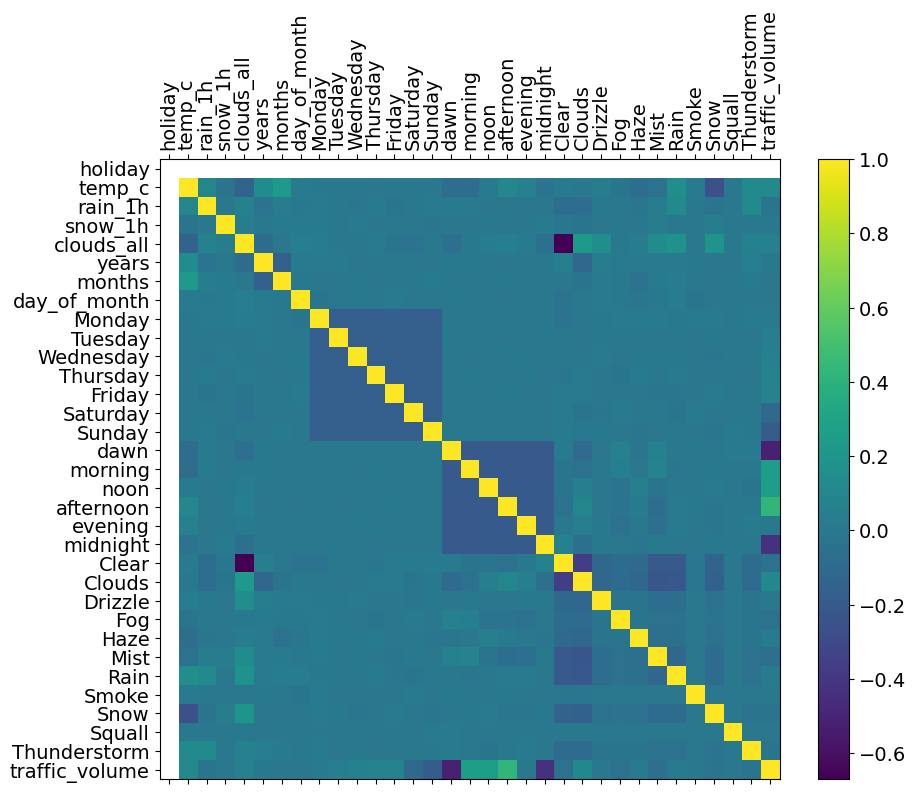

In [69]:
#Correlation Matrix, standard method 'Pearson'
f = plt.figure(figsize=(10, 8))
plt.matshow(features.corr(), fignum=f.number)
plt.xticks(range(features.shape[1]), features.columns, fontsize=14, rotation=90)
plt.yticks(range(features.shape[1]), features.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

There are no strong correlation among all the variables, except the one Clear-Clouds_all and those
of the days of the week.
Even more we note the lack of strong correlations between most of the variables and our target
variable. The exceptions in this case are to be found on the days of the week (especially those of
the weekend) and the part of the day

# Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error #to evaluate r2 score, mse, mae

In [35]:
features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'years',
       'months', 'day_of_month', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'dawn', 'morning', 'noon', 'afternoon',
       'evening', 'midnight', 'Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze',
       'Mist', 'Rain', 'Smoke', 'Snow', 'Squall', 'Thunderstorm'],
      dtype='object')

In [36]:
X = features.iloc[:,30]
y = features.iloc[:,30]

I decided to split the dataset in training set for the 80% and test set for the last 20%.
Notice below I do not shuffle our data, this is due to the time-series nature of the data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle =False, random_state = 1231)

# Normalization

Normalization should be done after splitting the data between training and test set, using only the
data from the training set. This is because the testing data points represent real-world data, so it’s
not supposed to be accessible at the training stage. Using any information coming from the test
set before or during training is a potential bias in the evaluation of the performance.
Therefore, we should perform feature scaling over the training data and then perform normalization
on testing instances but this time using the mean and standard deviation of training explanatory
variables.

In [40]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_train_norm= pd.DataFrame(scaler.fit_transform(X_test.values.reshape(-1,1)) )

In [86]:
X_test_norm = pd.DataFrame(scaler.transform(X_test.values.reshape(-1,1)))

In [87]:
X_train_norm.isna().sum()

0    0
dtype: int64

In [88]:
X_test_norm.isna().sum()

0    0
dtype: int64

In [89]:
X_test_norm.columns

RangeIndex(start=0, stop=1, step=1)

In [90]:
y_test.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

# Modelling

### Multiple Linear Regression

Multiple Linear Regression fits a linear model with coefficients to minimize the residual sum of
squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [77]:
Model= ['Linear Regression', 'Linear SVR', 'SVR','Decision Tree','Random Forest Regression', 'Gradient Boosting Regression', 'K-Nearest Neighbors']
R_squared =list()
RMSE = list()
MAE = list()


In [78]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [79]:
LR = LinearRegression()
LR.fit(X_train_norm,y_train)

LinearRegression()

In [76]:
y_test

array([[0, 0, 0, ..., 0, 0, 0]])

In [63]:
X_train_norm.columns

RangeIndex(start=0, stop=1, step=1)

In [57]:
test = pd.read_csv("")

FileNotFoundError: [Errno 2] No such file or directory: ''

In [65]:
LR = LinearRegression()
LR.fit(X_test.values.reshape(-1,1),y_test)
y_test = np.array(y_test.values.tolist())


In [73]:
y_test_reshaped=y_test.reshape(1,-1)

In [74]:
predictions = LR.predict(y_test_reshaped)

ValueError: X has 1929 features, but LinearRegression is expecting 1 features as input.

In [81]:
print('R square score on train set and test set are :',LR.score(X_train_norm,y_train),LR.score(X_test_norm,y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,LR.predict(X_test_norm))))
print('Mean absolute error :',mean_absolute_error(y_test,LR.predict(X_test_norm)))

R square score on train set and test set are : 0.6950081730314502 0.6820586101590682
Root mean squared error : 1052.8818048803037
Mean absolute error : 824.4398419637799


In [82]:
R_squared.append(LR.score(X_test_norm, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,LR.predict(X_test_norm))))
MAE.append(mean_absolute_error(y_test,LR.predict(X_test_norm)))

In [96]:
#predictions = LR.predict(X_test,y_test)

### Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification,
regression and outliers detection.
The method to solve regression problems is called Support Vector Regression, it depends only on a
subset of the training data, because the cost function ignores samples whose prediction is close to
their target.

In [1]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

#### Linear Support Vector Regression

LinearSVR provides a faster implementation than SVR but only considers the linear kernel, but
it has more flexibility in the choice of penalties and loss functions and should scale better to large
numbers of samples.


In [2]:
LinearSVR = LinearSVR(random_state= 1231)
#LinearSVR.fit(X_train_norm,y_train)
LinearSVR.fit(X_test,y_test)
LinearSVR.predict(X_test,y_test)


NameError: name 'X_test' is not defined

In [85]:
print('R square score on train set and test set are :',LinearSVR.score(X_train_norm,y_train),LinearSVR.score(X_test_norm,y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,LinearSVR.predict(X_test_norm))))
print('Mean absolute error :',mean_absolute_error(y_test,LinearSVR.predict(X_test_norm)))


R square score on train set and test set are : 0.6614991304659714 0.6512857884845551
Root mean squared error : 1102.6581960161204
Mean absolute error : 882.0069668261871


Tuning the Hyper-parameters During the building of our models, it is possible and recommended to search the hyper-parameter space for the best cross validation score. Any parameter
provided when constructing an estimator may be optimized in this manner.
The approach I used to parameter search is provided by GridSearchCV, exhaustively generates
candidates from a grid of parameter values specified with the parameter_grid parameter.
In this case, I will evaluate models using the negative mean absolute error
(neg_mean_absolute_error). It is negative because the GridsearchCV requires the score to
be maximized, so the MAE is made negative, meaning scores scale from -infinity to 0 (best).

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter_grid = {'C': range(1,100)}
GS=GridSearchCV(LinearSVR,parameter_grid,cv=3, scoring='neg_mean_squared_error')
GS.fit(X_train_norm,y_train)

GridSearchCV(cv=3, estimator=LinearSVR(random_state=1231),
             param_grid={'C': range(1, 100)}, scoring='neg_mean_squared_error')

In [88]:
GS.best_params_

{'C': 4}

In [89]:
from sklearn.svm import LinearSVR

In [90]:
HLinearSVR = LinearSVR(C=3, random_state=1213)
HLinearSVR.fit(X_train_norm,y_train)

LinearSVR(C=3, random_state=1213)

In [91]:
print('R square score on train set and test set are :',HLinearSVR.score(X_train_norm,y_train),HLinearSVR.score(X_test_norm,y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,HLinearSVR.predict(X_test_norm))))
print('Mean absolute error :',mean_absolute_error(y_test,HLinearSVR.predict(X_test_norm)))


R square score on train set and test set are : 0.6817211111062997 0.6642508504577063
Root mean squared error : 1081.9658342114756
Mean absolute error : 816.6404737727481


In [92]:
R_squared.append(HLinearSVR.score(X_test_norm, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test,HLinearSVR.predict(X_test_norm))))
MAE.append(mean_absolute_error(y_test,HLinearSVR.predict(X_test_norm)))

#### Support Vector Regressor

In [93]:
SVR = SVR()
SVR.fit(X_train_norm,y_train)

SVR()

In [ ]:
print('R square score on train set and test set are :',SVR.score(X_train_norm,y_train),SVR.score(X_test_norm,y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,SVR.predict(X_test_norm))))
print('Mean absolute error :',mean_absolute_error(y_test,SVR.predict(X_test_norm)))


In [99]:
test = pd.read_csv("test_set_nogt.csv")
test.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
1,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
2,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
3,NaN,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00
4,NaN,281.18,0.0,0.0,1,Clear,sky is clear,03-10-2012 02:00


In [100]:
test.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time'],
      dtype='object')

In [101]:
test.rename(columns={'temp':'temp_c'}, inplace=True)

In [102]:
test.head()

,holiday,temp_c,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
1,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
2,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
3,NaN,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00
4,NaN,281.18,0.0,0.0,1,Clear,sky is clear,03-10-2012 02:00


In [105]:
test[features]

ValueError: Boolean array expected for the condition, not object

In [104]:
predictions= LR.predict(test)
predictions

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- date_time
- weather_description
- weather_main
Feature names seen at fit time, yet now missing:
- Clear
- Clouds
- Drizzle
- Fog
- Friday
- ...


In [41]:
!pip install nbconvert

  Using cached nbconvert-7.16.3-py3-none-any.whl.metadata (8.2 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached tinycss2-1.2.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached fastjsonschema-2.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.34.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.18.0-cp311-none-win_amd64.whl.metadata (4.2 kB)
Using cached nbconvert-7.16.3-py3-none-any.whl (257 kB)
Using cached mistune-3.0.2-py3-none-any.whl (47 kB)
Using cached nbclient-0.10.0-py3-none-any.